In [31]:
import pandas as pd 
from sklearn import linear_model
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
df = pd.read_csv('day.csv')

Más informacióm del dataset 

El objetivo es predecir cuantas vicicletas se van a rentar

https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset


Quita las variables de casual, registered, instant, fecha, mes, año de tu entrenamiento

Hay varias categoricas, cuales son? coviertelas e one hot encoding 

Crea variables dummy 

In [32]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [33]:
df.season.unique()

array([1, 2, 3, 4])

In [34]:
df[['casual', 'cnt']].corr()

,casual,cnt
casual,1.000000,0.672804
cnt,0.672804,1.000000


In [35]:
df= df.drop(columns=['casual','registered','instant','dteday','mnth','yr'])

In [36]:
target = 'cnt'
y = df[target]

In [37]:
X = df.copy()
X = X.drop(target, axis=1)
X = pd.get_dummies(X,columns=['season','weekday','weathersit'])


In [38]:
X

,holiday,workingday,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3
0,0,0,0.344167,0.363625,0.805833,0.160446,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1,0,0,0.363478,0.353739,0.696087,0.248539,1,0,0,0,1,0,0,0,0,0,0,0,1,0
2,0,1,0.196364,0.189405,0.437273,0.248309,1,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,1,0.200000,0.212122,0.590435,0.160296,1,0,0,0,0,0,1,0,0,0,0,1,0,0
4,0,1,0.226957,0.229270,0.436957,0.186900,1,0,0,0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0,1,0.254167,0.226642,0.652917,0.350133,1,0,0,0,0,0,0,0,1,0,0,0,1,0
727,0,1,0.253333,0.255046,0.590000,0.155471,1,0,0,0,0,0,0,0,0,1,0,0,1,0
728,0,0,0.253333,0.242400,0.752917,0.124383,1,0,0,0,0,0,0,0,0,0,1,0,1,0
729,0,0,0.255833,0.231700,0.483333,0.350754,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [39]:
model = linear_model.LinearRegression().fit(X,y)

In [40]:
predicciones = model.predict(X)

In [41]:
r2_score(y_pred=predicciones, y_true=y)

0.5632564746293716

In [42]:
coeficientes = pd.DataFrame({
    'names':X.keys(),
    'coeficientes':model.coef_
})
coeficientes

,names,coeficientes
0,holiday,2.476933e+16
1,workingday,2.476933e+16
2,temp,5.434741e+03
3,atemp,9.043608e+02
4,hum,-2.479033e+03
5,windspeed,-3.172996e+03
6,season_1,-4.031178e+16
7,season_2,-4.031178e+16
8,season_3,-4.031178e+16
9,season_4,-4.031178e+16


In [43]:
calibracion = pd.DataFrame({
    'predicciones':predicciones,
    'real':y
})

In [44]:
calibracion['bins']=pd.qcut(calibracion['predicciones'], q = 10, labels=False)+1

In [45]:
grouped_calibracion = calibracion.groupby('bins').mean()
grouped_calibracion['error']=(grouped_calibracion.predicciones - grouped_calibracion.real)/grouped_calibracion.predicciones

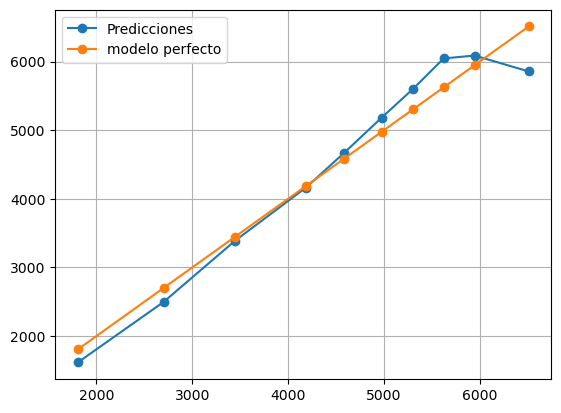

In [46]:
plt.plot(grouped_calibracion.predicciones.values, grouped_calibracion.real.values, marker = "o", label="Predicciones")
plt.plot(grouped_calibracion.predicciones.values, grouped_calibracion.predicciones.values, marker = "o", label = "modelo perfecto")
plt.legend()
plt.grid()